## Importing libraries

In [63]:
import pandas as pd
import numpy as np
import sklearn
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle


### Loading data

In [64]:
data = pd.read_csv("student-mat.csv", sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### training and testing data

In [65]:
data = data[["G1","G2","G3","studytime","failures","absences"]]
predict = "G3"
x = np.array(data.drop([predict], axis= 1))#features
y = np.array(data[predict])#labels

x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.3)


### Machine Learning model

In [66]:
linear = LinearRegression()

#### fitting the model

In [67]:

linear.fit(x_train,y_train)

LinearRegression()

#### accuracy

In [68]:

acc = linear.score(x_test,y_test)
acc

0.8363823478178732

#### coefficient


In [73]:
linear.coef_

array([ 0.15953991,  0.98687356, -0.17269006, -0.21700851,  0.02641224])

#### intercept

In [70]:

linear.intercept_

-1.6725881733875845

In [71]:
#predictions
pred = linear.predict(x_test)
for i in range(len(pred)):
    print(pred[i], x_test[i],y_test[i])

15.722828010710344 [17 15  1  0  2] 15
11.791817752158444 [12 12  2  0  2] 11
7.518466658097028 [ 9  8  2  1 16] 7
3.8197479896506445 [5 5 2 0 4] 6
14.244184584146142 [15 14  2  0  2] 14
3.389308628037422 [3 5 2 1 8] 5
10.592579807745377 [11 11  2  0  0] 10
18.57684519597942 [18 18  3  0  5] 19
15.01869375594833 [14 15  2  0  0] 15
11.841064568431257 [14 12  2  1  0] 12
4.199091844895358 [ 6  5  1  1 14] 5
6.99379951239257 [7 8 2 0 0] 0
12.786130873947869 [11 13  1  1 10] 13
12.108764638446209 [12 12  2  0 14] 12
13.255178101811318 [13 13  2  0 14] 14
3.817899299554947 [ 6  5  1  3 16] 5
12.071223234309581 [13 12  1  0  0] 12
15.402793673237493 [16 15  3  0  9] 16
13.566462569908106 [12 14  3  0  1] 15
3.612311964365448 [6 5 1 2 0] 0
13.858063677785488 [13 14  3  0  6] 14
12.885406734475593 [13 13  2  0  0] 12
5.8342358963433245 [7 7 3 0 0] 8
7.020323688072256 [9 8 4 0 2] 8
7.661877494116737 [8 9 1 3 0] 10
10.499126471375702 [11 11  3  0  3] 11
10.698228769841299 [11 11  2  0  4] 11
10

### importing matplotlib and pickle

In [72]:
import pickle
from matplotlib import style
import matplotlib.pyplot as plt

### pickling

In [75]:
with open("stu.pickle","wb") as f:
    pickle.dump(linear,f)

#### Loading our model

In [76]:
pik = open('stu.pickle','rb')
linear = pickle.load(pik)

### Training multiple model

In [78]:
best = 0
for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))
    
    # If the current model has a better score than one we've already trained then save it
    if acc > best:
        best = acc
        with open("stu.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.8205079144991685
Accuracy: 0.7973798607826582
Accuracy: 0.828287919818314
Accuracy: 0.8148944678783712
Accuracy: 0.8357552059643739
Accuracy: 0.6456141858191193
Accuracy: 0.8274715914719714
Accuracy: 0.8567510067015223
Accuracy: 0.8301217952612556
Accuracy: 0.8264471834525806
Accuracy: 0.7647626483532286
Accuracy: 0.897124043916997
Accuracy: 0.801471760668675
Accuracy: 0.8341294832282313
Accuracy: 0.876294795680013
Accuracy: 0.7829490112972742
Accuracy: 0.8785881947539769
Accuracy: 0.8135940703680797
Accuracy: 0.8496159721287176
Accuracy: 0.918066797791055
Accuracy: 0.8477619326261331
Accuracy: 0.7921119108869051
Accuracy: 0.8009102237652839
Accuracy: 0.8095522759612059
Accuracy: 0.840500627689293
Accuracy: 0.7914848838006535
Accuracy: 0.7873267597033508
Accuracy: 0.8792996443507257
Accuracy: 0.772931688581208
Accuracy: 0.794012510950658
Accuracy: 0.819542318084703
Accuracy: 0.8214958900794957
Accuracy: 0.7646922402324134
Accuracy: 0.8517075883631926
Accuracy: 0.82448459330

In [79]:
best

0.918066797791055

### Plotting graph

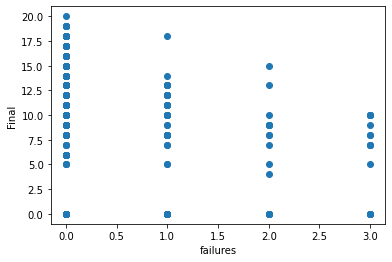

In [82]:
plot = "failures"
plt.scatter(data[plot], data["G3"])
#plt.legend("studentmarks",loc = 4)
plt.xlabel(plot)
plt.ylabel("Final")
plt.show()